## Explanatory Data Analysis on Sample Superstore 

##### Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("SampleSuperstore.csv")

In [5]:
df.shape

(9994, 13)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


### No null values

##### Postal code here is not valuable in the describe form

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.shape

(9994, 13)

In [11]:
df.drop_duplicates(keep = 'first', inplace = True)

#### Duplicates rows deleted

In [12]:
df.shape

(9977, 13)

#### Explanatory Data Analysis on the Superstore Data

In [13]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


### Total Sales and the Profit

In [14]:
print('Total Profit of the SuperStore  : ' , df['Profit'].sum())

Total Profit of the SuperStore  :  286241.4226


In [15]:
print('Total sales of the SuperStore  : ' , df['Sales'].sum())

Total sales of the SuperStore  :  2296195.5903


#### California has the Highest Sales

In [16]:
Sales_5 = df.groupby("State").Sales.sum().sort_values(ascending = False).head(5)

Text(0.5, 1.0, 'State with Highest Sales')

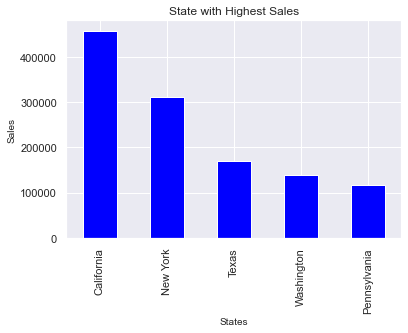

In [17]:
sns.set()
Sales_5.plot(kind = 'bar', color = 'blue')
plt.xlabel('States', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('State with Highest Sales')


#### California has the Highest Profit as well

In [18]:
Profit_5 = df.groupby("State").Profit.sum().sort_values(ascending = False).head(5)

Text(0.5, 1.0, 'States with the highest Profit')

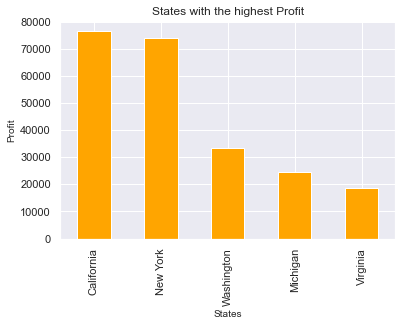

In [19]:
sns.set()
Profit_5.plot(kind = 'bar', color = 'orange')
plt.xlabel('States', fontsize = 10)
plt.ylabel('Profit', fontsize = 10)
plt.title('States with the highest Profit')


### California as well as New York has the Highest Sales and the Profit as compared to other States. they are far ahead

In [20]:
df_num = df[['Profit','Sales','Discount', 'Quantity']]

In [21]:
df_num.shape

(9977, 4)

In [22]:
df_num.corr()

,Profit,Sales,Discount,Quantity
Profit,1.000000,0.479067,-0.219662,0.066211
Sales,0.479067,1.000000,-0.028311,0.200722
Discount,-0.219662,-0.028311,1.000000,0.008678
Quantity,0.066211,0.200722,0.008678,1.000000


<AxesSubplot:>

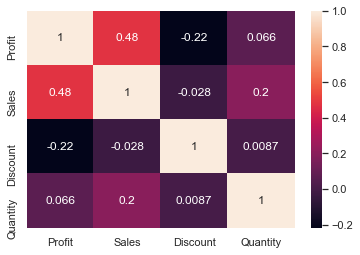

In [23]:
sns.heatmap(df_num.corr(), annot = True)

#### Positive corrlation between Sales and Profit and Negative Correlation between Discount and Profit

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

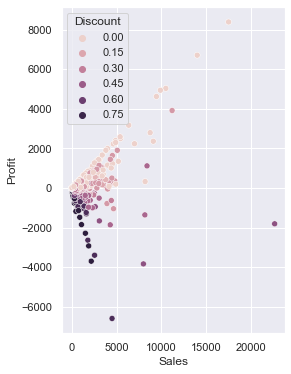

In [24]:
plt.figure(figsize = (4,6))
sns.scatterplot(x = 'Sales', y = 'Profit' , data =df, hue = 'Discount' )

### It is clear from the graph that as the Discount increases, profit goes down

#### When Discount is 0

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

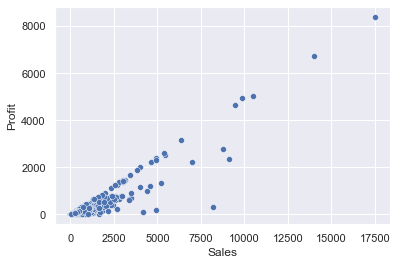

In [25]:
abc=df[df['Discount']==0]
sns.scatterplot(x='Sales',y='Profit',data=abc)

##### Positive relation between Sales and The Profit when the Discount is 0

In [26]:
abc.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


<AxesSubplot:>

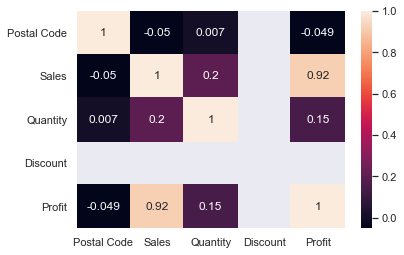

In [27]:
sns.heatmap(abc.corr(), annot = True)

##### 0.92 is the positive correlation

In [28]:
abc.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0.0,1.9656


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

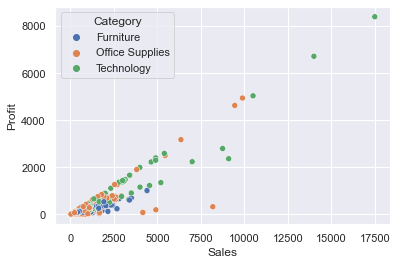

In [29]:
sns.scatterplot(x = 'Sales',y = 'Profit', data = abc , hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

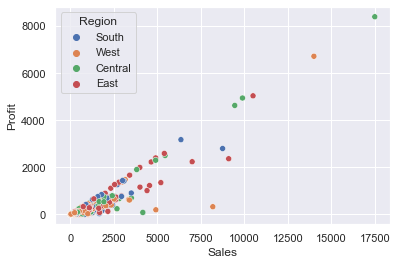

In [30]:
sns.scatterplot(x = 'Sales',y = 'Profit', data = abc , hue = 'Region')

C:\Users\Lakshay Tyagi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

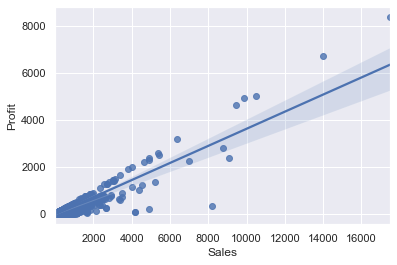

In [31]:
## Regressio Plot
sns.regplot(abc['Sales'],abc['Profit'])

#### When discount is not 0

In [32]:
abc=df[df['Discount']!=0]

In [33]:
abc.shape

(5190, 13)

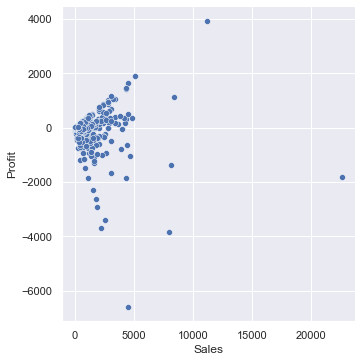

In [34]:
sns.relplot(x = 'Sales', y = 'Profit' , data = abc)

### It is clear that when discount is not zero, sales increase and profit Decreases

In [35]:
abc.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### Furniture is the Category that leads into the Loss when discount is given

<AxesSubplot:xlabel='Category'>

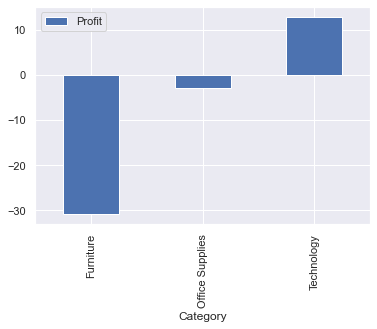

In [36]:
pqr=pd.pivot_table(abc,index='Category',values='Profit')
pqr.plot(kind='bar')

Text(0, 0.5, 'Profit')

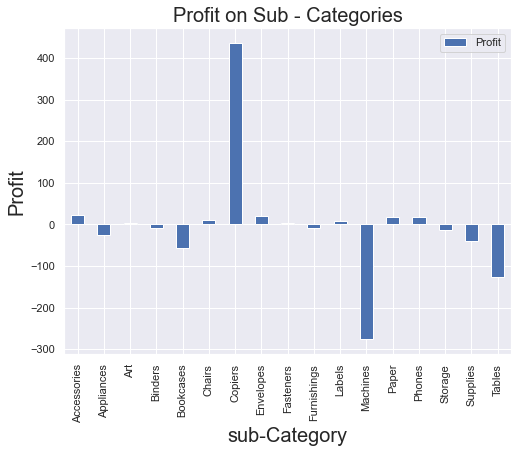

In [37]:
#plt.figure(figsize = (10,12))
pqr=pd.pivot_table(abc,index='Sub-Category',values='Profit')
pqr.plot(kind='bar', figsize = (8,6))
plt.title('Profit on Sub - Categories', fontsize = 20)
plt.xlabel('sub-Category',fontsize = 20)
plt.ylabel('Profit',fontsize = 20)

#### Copier has the highest profit but Machines and Tables had the highest loss

Text(0, 0.5, 'Sales')

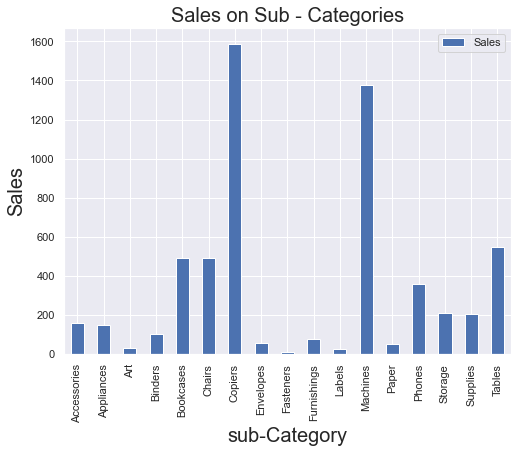

In [38]:
#plt.figure(figsize = (10,12))
pqr=pd.pivot_table(abc,index='Sub-Category',values='Sales')
pqr.plot(kind='bar', figsize = (8,6))
plt.title('Sales on Sub - Categories', fontsize = 20)
plt.xlabel('sub-Category',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)

#### Machines and Tables has the highest Sales but profit is down because of the heavy discounts were given

<AxesSubplot:xlabel='Region', ylabel='Profit'>

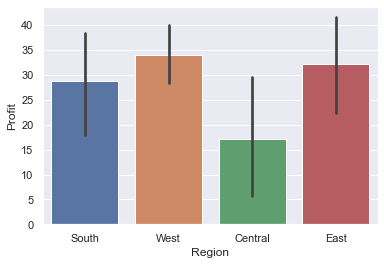

In [39]:
sns.barplot(x = 'Region', y = 'Profit', data = df, )

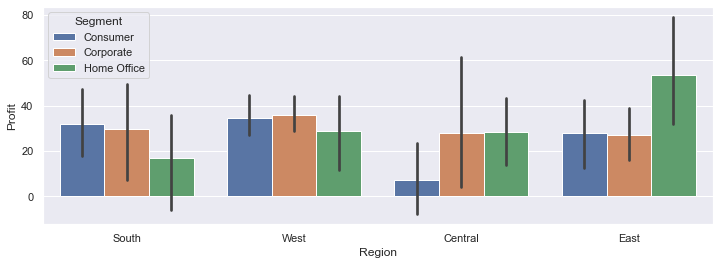

In [40]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'Region', y = 'Profit', data = df, hue = 'Segment' )
plt.show()


### Central Region has less profit in Consumer Segment

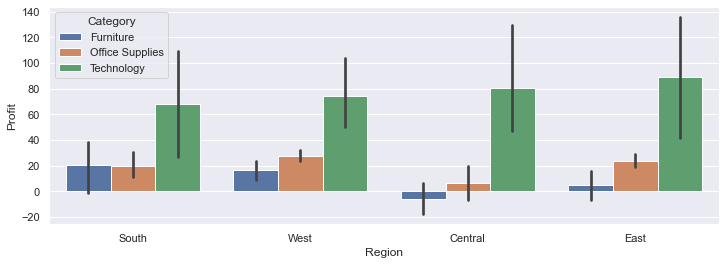

In [41]:
plt.figure(figsize = (12,4))
sns.barplot(data = df , x = 'Region',y = 'Profit' ,hue = 'Category')
plt.show()

##### Central region is only region in the loss. Furniture is the Category that leads to a loss

In [42]:
pqr = df[df['Region']=='Central']

In [43]:
pqr.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.858
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.816


<AxesSubplot:xlabel='Category', ylabel='Profit'>

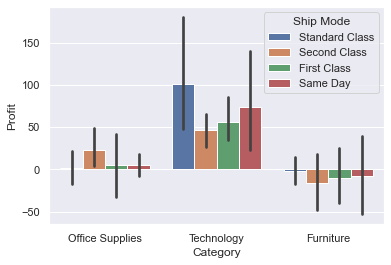

In [44]:
sns.barplot(y = 'Profit', x = 'Category' , data = pqr  , hue = 'Ship Mode')

#### Loss occoured in Furniture Cateory irrespective to ship mode mainly in theCentral Region

In [45]:
df.shape

(9977, 13)

In [46]:
df_fur = df[df['Category']=='Furniture']

In [47]:
df_fur.shape

(2118, 13)

<AxesSubplot:>

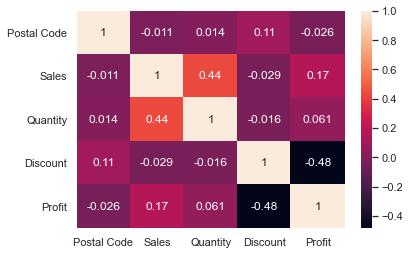

In [48]:
sns.heatmap(df_fur.corr(), annot = True)

### Upto some extent , Postal Code is showing positive relation with Discount

In [49]:
df_furn_cen = df[df['Region']== 'Central']

In [50]:
df_furn_cen.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.858
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.816


In [51]:
df_furn_cen.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.071429,-0.007991,0.468865,-0.151534
Sales,-0.071429,1.000000,0.183063,-0.109212,0.640750
Quantity,-0.007991,0.183063,1.000000,0.014953,0.047543
Discount,0.468865,-0.109212,0.014953,1.000000,-0.225530
Profit,-0.151534,0.640750,0.047543,-0.225530,1.000000


<AxesSubplot:xlabel='State', ylabel='Profit'>

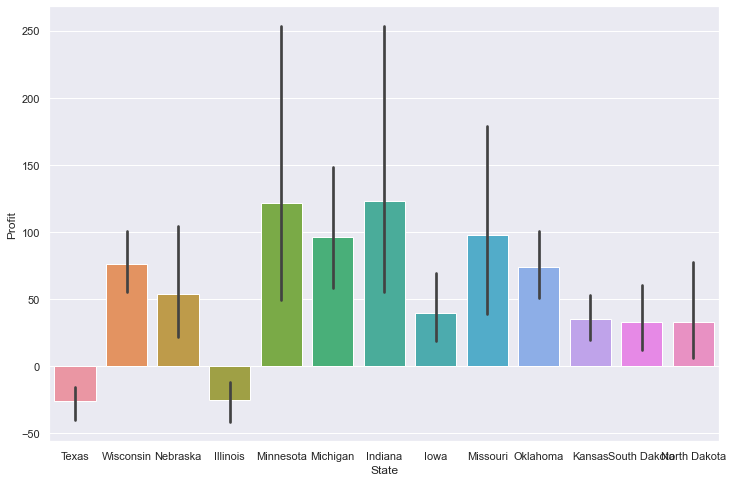

In [52]:
plt.figure(figsize = (12,8))
sns.barplot(data = df_furn_cen , x = 'State',y = 'Profit')

### Texas and Illinois are the two states where profit is negative

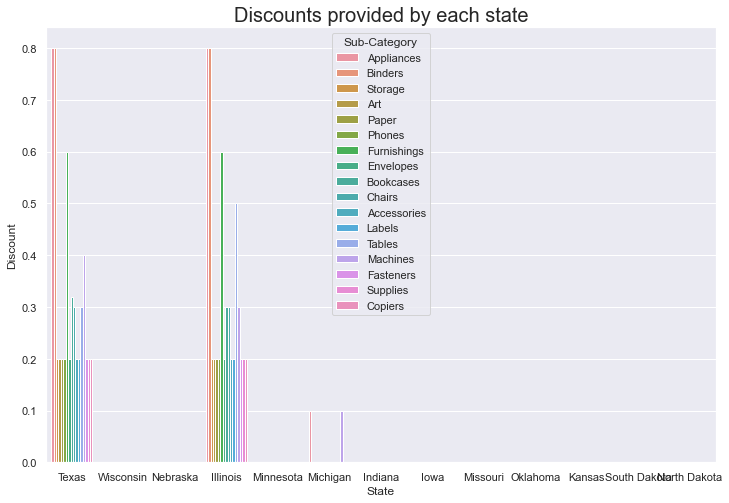

In [53]:
plt.figure(figsize = (12,8))
sns.barplot(data = df_furn_cen , x = 'State',y = 'Discount' ,hue = 'Sub-Category')
plt.title('Discounts provided by each state', fontsize = 20)
plt.show()

#### Heavy discounts were given , 60% On Furniture

<AxesSubplot:xlabel='Category'>

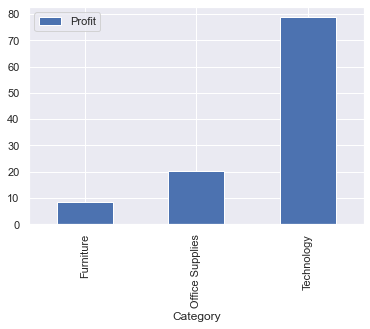

In [54]:
abc=pd.pivot_table(df,index='Category',values='Profit')
abc.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

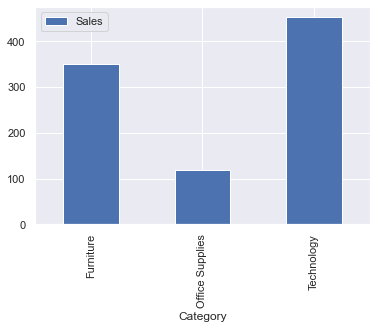

In [55]:
abc=pd.pivot_table(df,index='Category',values='Sales')
abc.plot(kind='bar')

###  In Technology, Sales is high and profit is also High